In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('max_colwidth', 800)

In [4]:
results = [file for file in os.listdir('/home/will/Downloads/qm_result_0724/0724/') if 'result' in file]
df_list = []
for result in results:
    df = pd.read_csv('/home/will/Downloads/qm_result_0724/0724/'+result,na_values=0)
    df['file_name'] = result
    df_list.append(df)
df = pd.concat(df_list,ignore_index=True)#.fillna(1e4)

In [6]:
df

,reuse,block,head,data,batch_size,dim,clip,layer1,layer2,factor,...,train_type_7,val_type_0,val_type_1,val_type_2,val_type_3,val_type_4,val_type_5,val_type_6,val_type_7,file_name
0,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.023221,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
1,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.250127,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
2,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.389677,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
3,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.484663,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
4,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.587320,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
5,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.644455,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
6,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.698666,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
7,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.747591,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
8,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.770520,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv
9,False,<class 'functions_refactor.NNConv_block'>,<class 'functions_refactor.SimpleHead_type'>,../Data/{}_data_ACSF_expand_PCA.pickle,32,128,2,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.805558,NaN,NaN,results_False_<class 'functions_refactor.NNConv_block'>_<class 'functions_refactor.SimpleHead_type'>__data_ACSF_expand_PCA.pickle_32_128_2_3_2_2_50_type_5_start.csv


In [8]:
df.min(0)

reuse                                                                                                                                                                          False
block                                                                                                                                      <class 'functions_refactor.NNConv_block'>
head                                                                                                                                    <class 'functions_refactor.SimpleHead_type'>
data                                                                                                                                          ../Data/{}_data_ACSF_expand_PCA.pickle
batch_size                                                                                                                                                                        32
dim                                                                                            

In [9]:
pd.isnull(df['type']).sum()

KeyError: 'type'

In [10]:
df['type'] = df.file_name.str.split('type_',expand=True)[1].str[0]

In [11]:
df = df.loc[np.logical_not(df.type.isnull())]

In [12]:
gb = df.groupby(['type','file_name'])

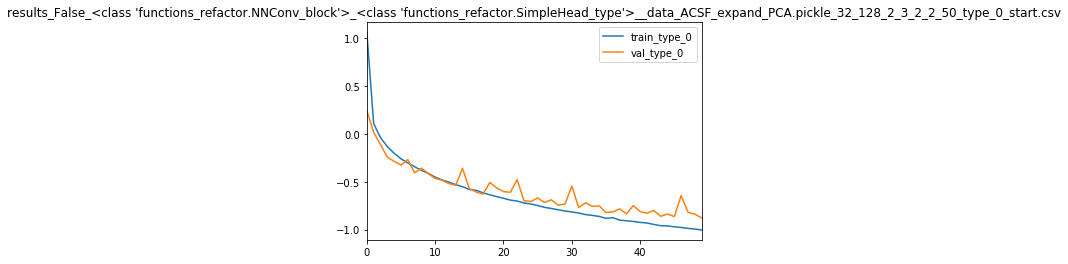

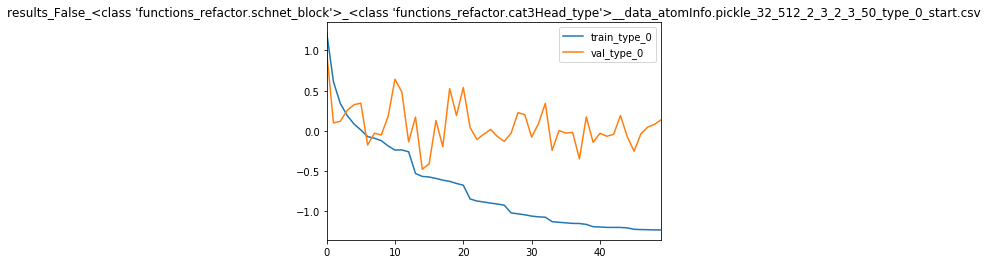

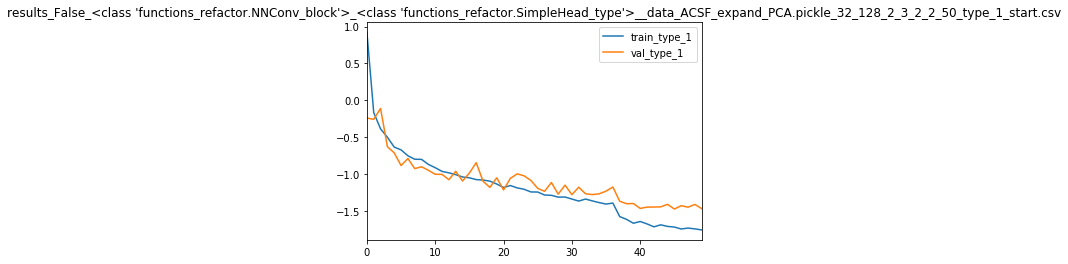

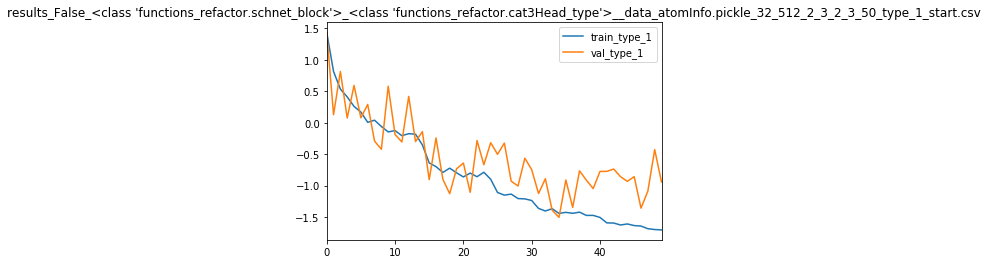

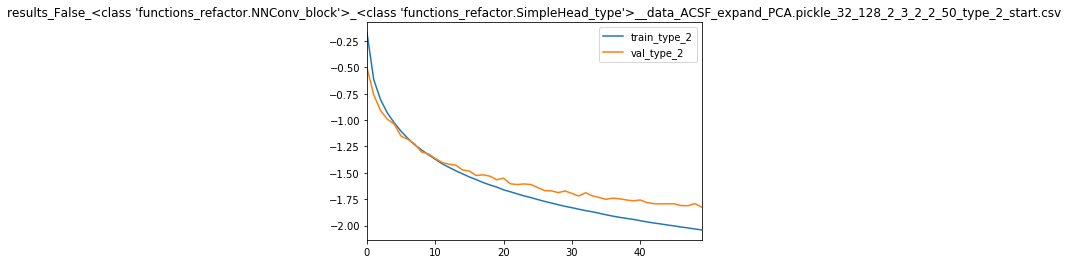

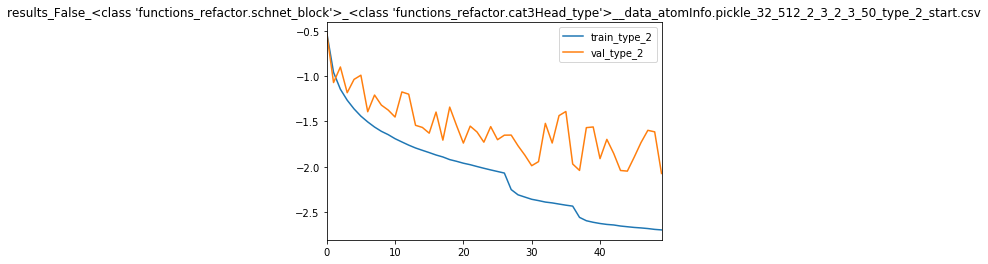

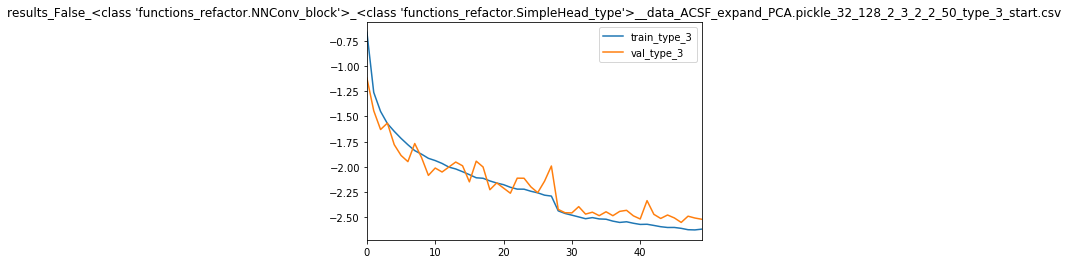

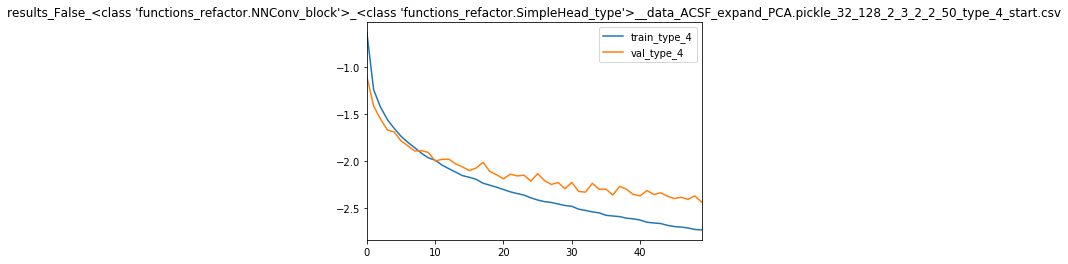

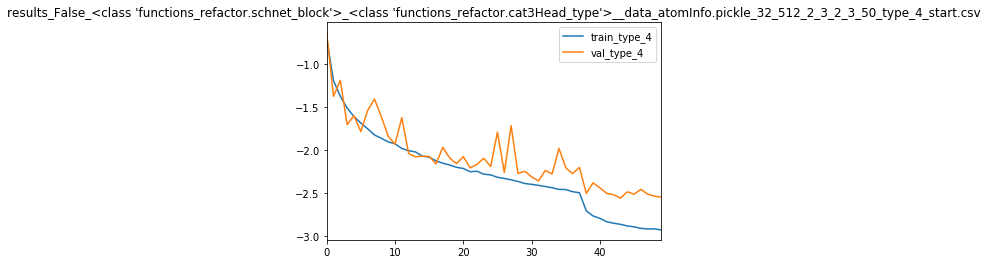

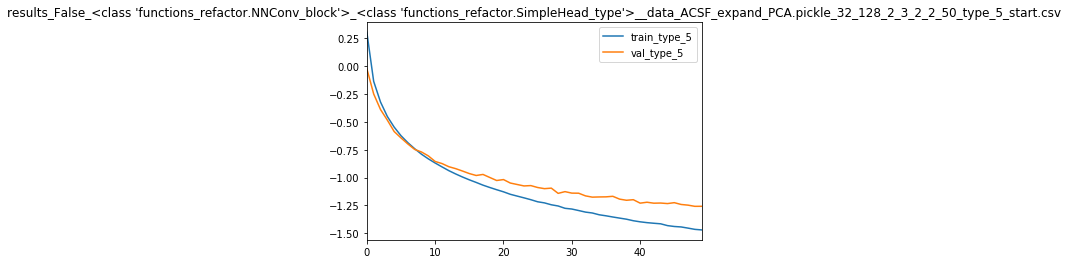

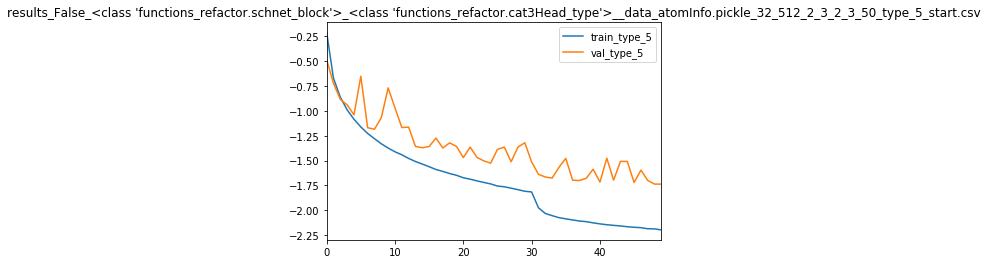

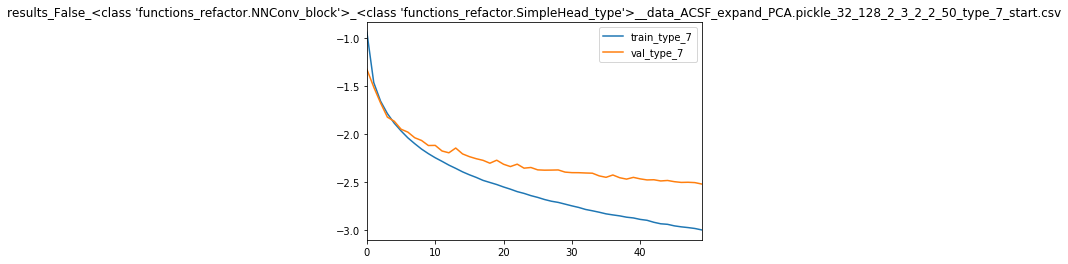

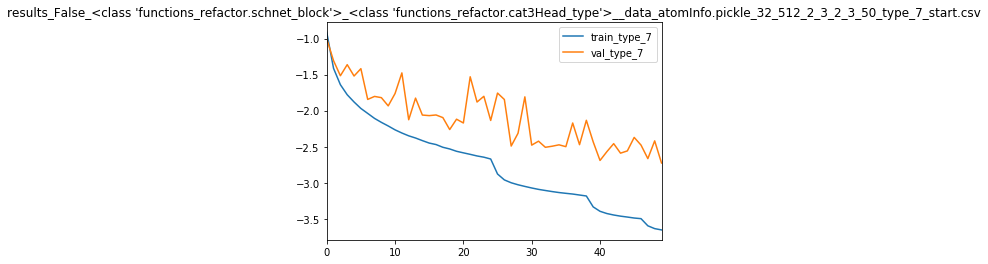

In [13]:
for name,group in gb:
    group[['train_type_'+name[0],'val_type_'+name[0]]].reset_index(drop=True).plot(title=name[1])
    plt.show()